In [1]:
!pip install wordcloud
!pip install xgboost

In [2]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [3]:
# NLTK libraries
import nltk

nltk.data.path.append('C:/Users/ssarkar4/AppData/Roaming/nltk_data')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sshah82\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Load the dataset 
df = pd.read_csv('C:/Users/sshah82/Desktop/5850/Project/archive/tripadvisor_hotel_reviews.csv')

# Check the first few rows of the dataset
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#Rating Distribution Check
# Check counts of all rating
df['Rating'].value_counts(normalize=True)

Rating
5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: proportion, dtype: float64

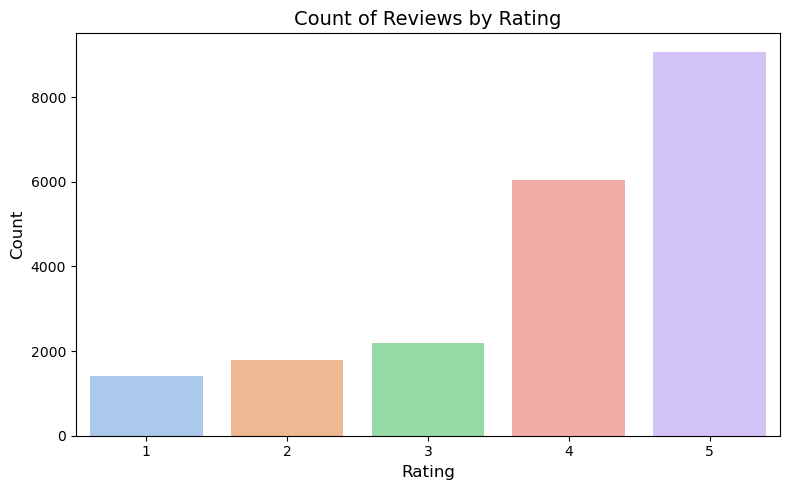

In [6]:
# Visualize rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='pastel')

# Add title and labels
plt.title('Count of Reviews by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [7]:
#Review Length
# Count length of the reviews
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


C:\Users\sshah82\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

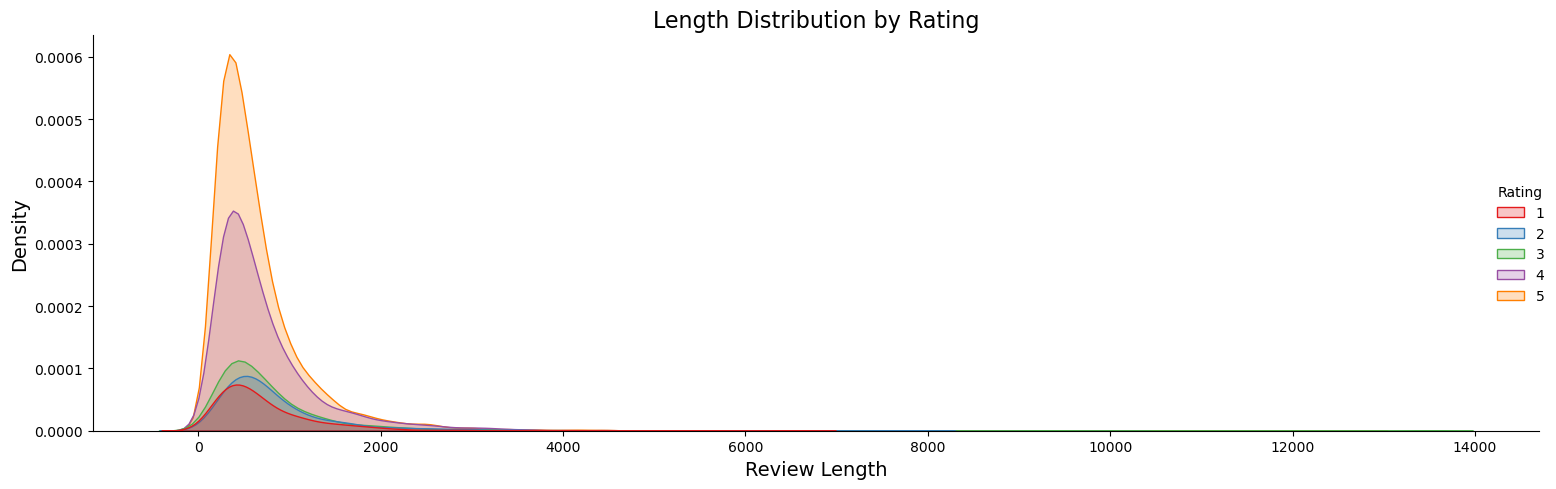

In [8]:
# Visualize length distribution based on the rating
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='Length', hue='Rating', kind='kde', fill=True, aspect=3, palette='Set1')

# Add titles and labels
plt.title('Length Distribution by Rating', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

In [9]:
#Data Cleaning
# Define a function to clean the text
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(.)\1\1+', r"\1\1", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if len(w) > 2]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    text = ' '.join(tokens)
    return text

# Apply new function
df['Review'] = df['Review'].apply(clean_text)

In [10]:
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,nothing special charge diamond member hilton d...,2,1689
2,nice room experience hotel monaco seattle good...,3,1427
3,unique great stay wonderful time hotel monaco ...,5,600
4,great stay great stay went seahawk game awesom...,5,1281


In [11]:
#20 Most Common words
# Find the most common words
all_words = ' '.join(df['Review']).lower().split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

print(top_words)

[('hotel', 52900), ('room', 46357), ('great', 21095), ('good', 17060), ('staff', 16285), ('stay', 15339), ('night', 14073), ('day', 12952), ('time', 12601), ('nice', 12409), ('location', 11234), ('service', 10533), ('stayed', 10469), ('restaurant', 10090), ('beach', 10043), ('breakfast', 9654), ('place', 9381), ('clean', 9372), ('food', 9255), ('resort', 8918)]


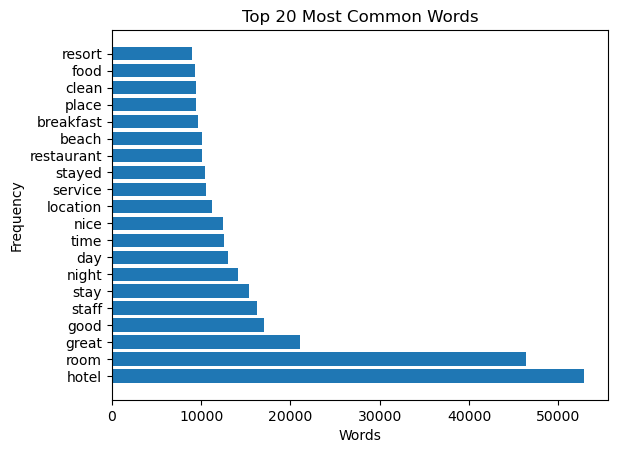

In [12]:
# Visualize most common words
fig, ax = plt.subplots()
ax.barh([word for (word, count) in top_words], [count for (word, count) in top_words])
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Words')
plt.show()

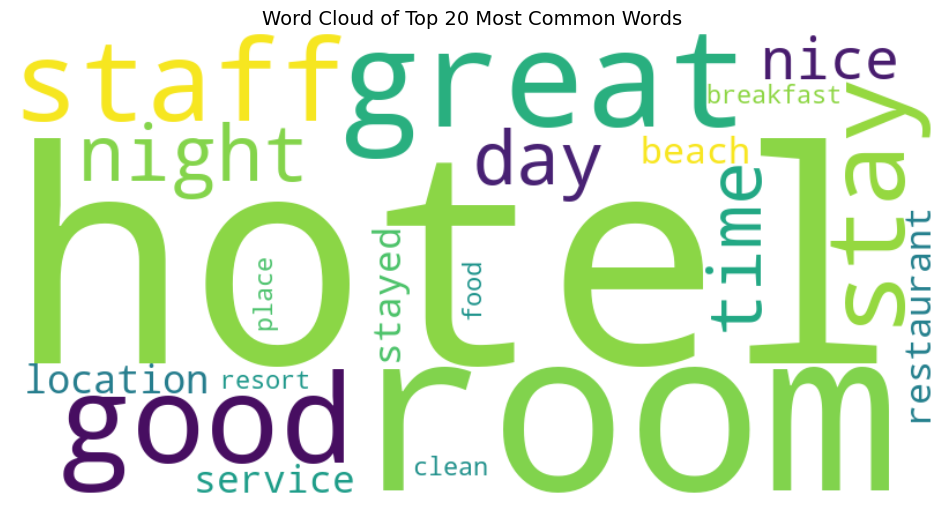

In [13]:
# Create a word cloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Top 20 Most Common Words', fontsize=14)  # Optional title
plt.show()  # Display the word cloud

In [14]:
#Sentiment Analysis
# Define a function to classify the sentiment of a review
sia = SentimentIntensityAnalyzer()

def get_sentiment(review):
    scores = sia.polarity_scores(review)
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# Apply function on dataset copy
df2 = df.copy()
df2['Predicted_Sentiment'] = df2['Review'].apply(get_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df2[df2['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(df2[df2['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(df2[df2['Predicted_Sentiment'] == 'neutral']))

Number of positive reviews: 19305
Number of negative reviews: 1045
Number of neutral reviews: 141


In [15]:
# Map the rating column to create new column true sentiment
df2['True_Sentiment'] = df2['Rating'].map({1: 'negative', 
                                           2: 'negative', 
                                           3: 'neutral', 
                                           4: 'positive', 
                                           5: 'positive'})


 Confusion Matrix:
          Predicted Negative  Predicted Neutral  Predicted Positive
negative         931                   95                  2188
neutral          72                   26                  2086
positive         42                   20                  15031


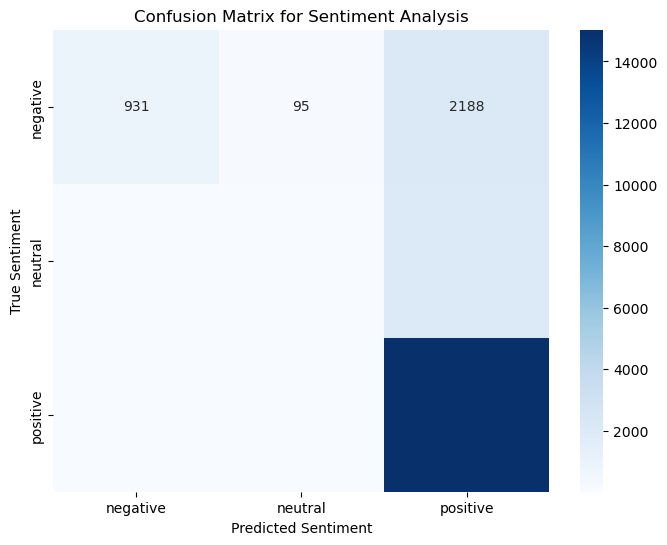

In [16]:
# Calculate confusion matrix
cm = confusion_matrix(df2['True_Sentiment'], df2['Predicted_Sentiment'])

# Print the confusion matrix with proper formatting
print("\n Confusion Matrix:")
print("          Predicted Negative  Predicted Neutral  Predicted Positive")
print(f"negative         {cm[0][0]}                   {cm[0][1]}                  {cm[0][2]}")
print(f"neutral          {cm[1][0]}                   {cm[1][1]}                  {cm[1][2]}")
print(f"positive         {cm[2][0]}                   {cm[2][1]}                  {cm[2][2]}")

# Define labels for the confusion matrix
labels = ['negative', 'neutral', 'positive']

# Set the figure size for better visibility
plt.figure(figsize=(8, 6))

# Create heatmap directly from the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix for Sentiment Analysis')

# Display the plot
plt.show()

In [17]:
print("\nClassification report:\n", classification_report(df2['True_Sentiment'], 
                                                          df2['Predicted_Sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.89      0.29      0.44      3214
     neutral       0.18      0.01      0.02      2184
    positive       0.78      1.00      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.62      0.43      0.44     20491
weighted avg       0.73      0.78      0.71     20491



In [18]:
#Prediction of Rating
# Define function for new column sentiment
positive = [4, 5]
neutral = [3]
negative = [1, 2]

def map_sentiment(rating):
    if rating in positive:
        return 2
    elif rating in neutral:
        return 1
    else:
        return 0

df['Sentiment']= df['Rating'].apply(map_sentiment)

In [19]:
# Prepare data for modeling
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(df['Review'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=24)

C:\Users\sshah82\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
#RandomForest
#Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

# Calculate accuracy and print classification report
accuracy_rf = accuracy_score(y_test, predicted_rf)
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))

Accuracy: 0.8024594963888346
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.46      0.61       810
           1       1.00      0.00      0.01       565
           2       0.79      1.00      0.88      3748

    accuracy                           0.80      5123
   macro avg       0.90      0.49      0.50      5123
weighted avg       0.83      0.80      0.74      5123



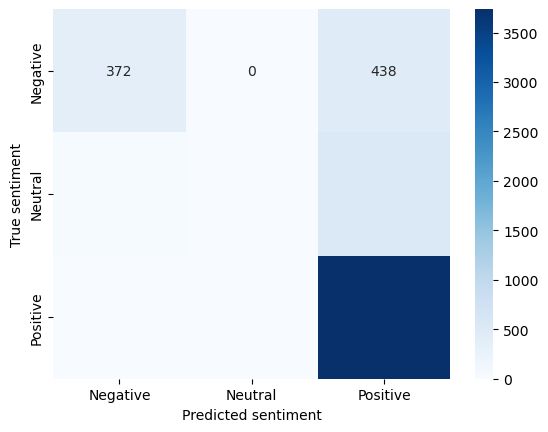

In [21]:
# Build confusion matrix
cm_rf = confusion_matrix(y_test, predicted_rf)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [22]:
#Naive Bayes Multinominal
# Build the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

predicted_nb = nb.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_nb = accuracy_score(y_test, predicted_nb)
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(classification_report(y_test, predicted_nb))

Accuracy: 0.8210033183681437
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       810
           1       1.00      0.00      0.00       565
           2       0.82      0.99      0.90      3748

    accuracy                           0.82      5123
   macro avg       0.88      0.53      0.53      5123
weighted avg       0.84      0.82      0.77      5123



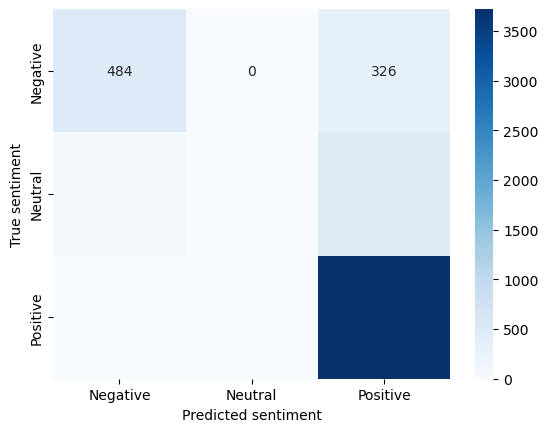

In [23]:
# Build confusion matrix
cm_nb = confusion_matrix(y_test, predicted_nb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [24]:
# Logistic Regression

# Build model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

predicted_lr = lr.predict(X_test)

# Calculate accuracy and print classification report
accuracy_lr = accuracy_score(y_test, predicted_lr)
print('Accuracy:', accuracy_lr)
print('Classification Report:')
print(classification_report(y_test, predicted_lr))


Accuracy: 0.8483310560218622
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       810
           1       0.50      0.12      0.19       565
           2       0.87      0.98      0.92      3748

    accuracy                           0.85      5123
   macro avg       0.72      0.61      0.62      5123
weighted avg       0.82      0.85      0.82      5123



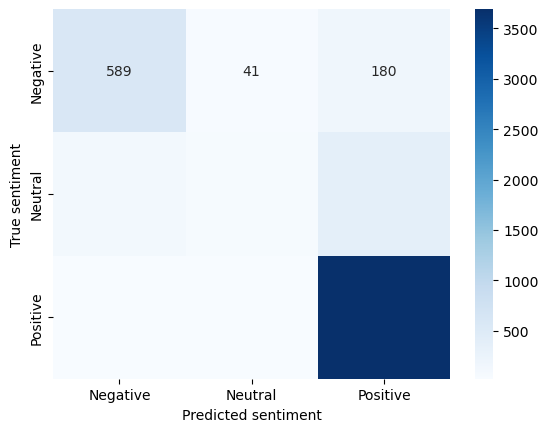

In [25]:
# Build confusion matrix
cm_lr = confusion_matrix(y_test, predicted_lr)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [26]:
# Linear Support Vector Classification

# Build model
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

predicted_svc = svc.predict(X_test)

# Calculate accuracy and print classification report
accuracy_svc = accuracy_score(y_test, predicted_svc)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, predicted_svc))

Accuracy: 0.8477454616435682
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       810
           1       0.42      0.20      0.28       565
           2       0.89      0.97      0.93      3748

    accuracy                           0.85      5123
   macro avg       0.69      0.64      0.65      5123
weighted avg       0.82      0.85      0.83      5123



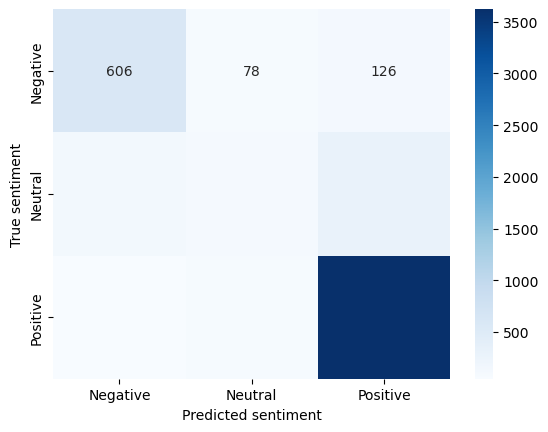

In [27]:
# Build confusion matrix
cm_svc = confusion_matrix(y_test, predicted_svc)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [28]:
# Compare models performance
Models = ['Random Forest', 'Naive Bayes Multinominal', 'Logistic Regression', 'SVC']
Scores = [accuracy_rf, accuracy_nb, accuracy_lr, accuracy_svc]
performance = pd.DataFrame(list(zip(Models, Scores)), 
                          columns = ['Models', 'Accuracy_score'])\
                            .sort_values('Accuracy_score', ascending=False)
performance

,Models,Accuracy_score
2,Logistic Regression,0.848331
3,SVC,0.847745
1,Naive Bayes Multinominal,0.821003
0,Random Forest,0.802459


In [29]:
!pip install pyLDAvis

In [30]:
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

In [31]:
#Prepare data for topic modeling
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the reviews
def preprocess(review):
    review = review.lower()
    tokens = nltk.word_tokenize(review)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 2]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the reviews
reviews = [preprocess(review) for review in df['Review']]

In [32]:
# Create a dictionary and corpus for the reviews
dictionary = corpora.Dictionary(reviews)
corpus = [dictionary.doc2bow(review) for review in reviews]

# Train an LDA model on the corpus
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

# Print the topics and the top words for each topic
for topic in lda_model.show_topics(num_topics=5):
    print('Topic', topic[0])
    print('Top words:', topic[1], '\n')

Topic 0
Top words: 0.053*"hotel" + 0.027*"room" + 0.018*"great" + 0.014*"location" + 0.014*"staff" + 0.012*"good" + 0.012*"stay" + 0.010*"breakfast" + 0.009*"clean" + 0.008*"stayed" 

Topic 1
Top words: 0.017*"beach" + 0.016*"resort" + 0.013*"food" + 0.011*"great" + 0.011*"pool" + 0.010*"day" + 0.010*"good" + 0.010*"time" + 0.008*"restaurant" + 0.008*"room" 

Topic 2
Top words: 0.035*"room" + 0.021*"hotel" + 0.010*"time" + 0.009*"night" + 0.009*"day" + 0.008*"staff" + 0.007*"stay" + 0.006*"told" + 0.006*"service" + 0.006*"got" 

Topic 3
Top words: 0.019*"hotel" + 0.011*"room" + 0.009*"day" + 0.005*"like" + 0.005*"night" + 0.005*"good" + 0.004*"time" + 0.004*"service" + 0.004*"really" + 0.004*"guest" 

Topic 4
Top words: 0.031*"room" + 0.022*"hotel" + 0.011*"nice" + 0.009*"night" + 0.008*"stay" + 0.008*"great" + 0.008*"good" + 0.008*"service" + 0.008*"view" + 0.007*"pool" 



In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
# Visualize the topics using pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [35]:
# Text Clustering for negative reviews

# Choose only negative reviews
df_neg = df[df['Rating'] <= 2]

# Convert text to numerical vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_neg['Review'])

# Cluster the documents using K-Means algorithm
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state=0)
kmeans.fit(X)

# Evaluate the performance of the clustering using adjusted Rand index
y_true = df_neg['Rating'].values
y_pred = kmeans.labels_
print('Adjusted Rand index:', adjusted_rand_score(y_true, y_pred))

Adjusted Rand index: 0.019169739451700297


In [36]:
# Reduce the dimensionality of the vectors to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [37]:
# Print the top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i+1} top terms:", [terms[ind] for ind in order_centroids[i, :10]])
    print('-------')

Cluster 1 top terms: ['room', 'hotel', 'stay', 'night', 'service', 'told', 'desk', 'day', 'time', 'staff']
-------
Cluster 2 top terms: ['hotel', 'room', 'stay', 'location', 'night', 'staff', 'good', 'bed', 'place', 'stayed']
-------
Cluster 3 top terms: ['resort', 'beach', 'food', 'room', 'day', 'pool', 'restaurant', 'time', 'service', 'good']
-------


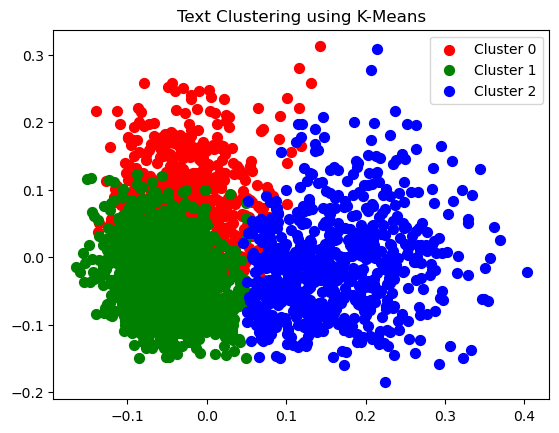

In [38]:
# Plot the clusters
colors = ['red', 'green', 'blue']
for i in range(num_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], s=50, c=colors[i], label='Cluster {}'.format(i))
plt.legend()
plt.title('Text Clustering using K-Means')
plt.show()

In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

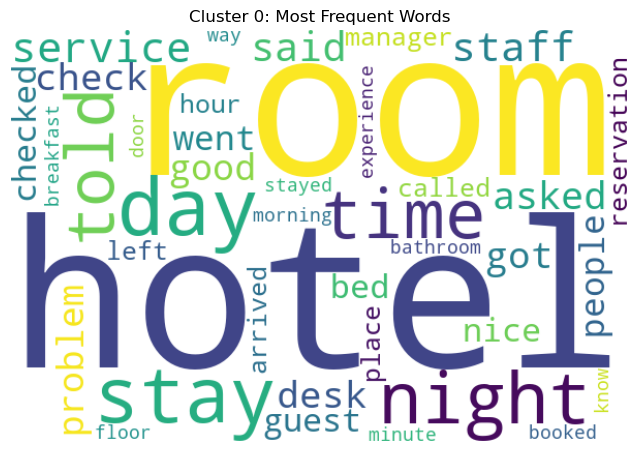

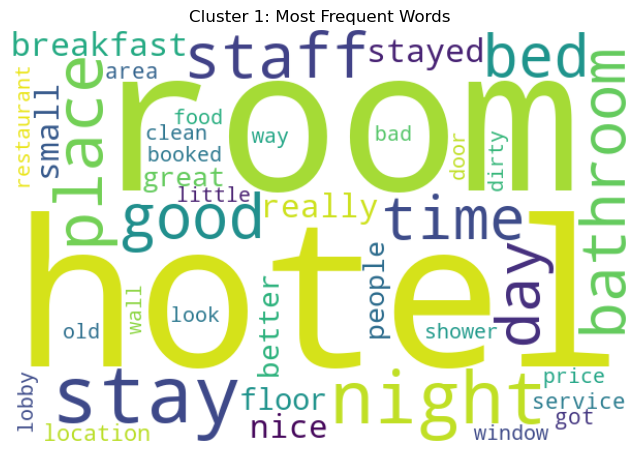

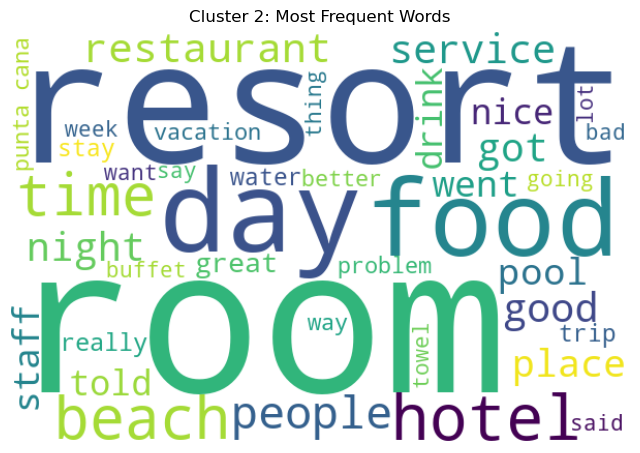

In [40]:
# Get the most frequent words in each cluster
top_words = 40
for i in range(num_clusters):
    cluster_reviews = df_neg['Review'][kmeans.labels_ == i]
    cluster_text = ' '.join(cluster_reviews)
    wordcloud = WordCloud(width=600, height=400, max_words=top_words, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}: Most Frequent Words'.format(i))
    plt.show()